<a href="https://colab.research.google.com/github/siddahant/DESOPT/blob/Second/converges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np

In [82]:
def linesearch(fun, g, H, x):
  a = 1 # maximum step length
  t = 0.4 # scale factor 
  count=0
  g=g(x)
  while count<100:
    if (fun(x-a*g) < fun(x) - t*a* np.dot(g, g)):
      break
    else:
      a=a*0.5
      count +=1 
  return a

def gradient(fun, g, H, x0):
  x=x0
  iter=0
  error= np.linalg.norm(fun(x))
  error_history = np.zeros(100)
  while error> 0.0001 and iter<100:
    a=linesearch(fun, g, H,x)
    x = x - a*(g(x))
    error=np.linalg.norm(fun(x))
    error_history[iter]=error
    iter +=1
  return x,error_history

In [83]:
fun= lambda x: (2-2*x[0]-3*x[1])**2 + (x[0])**2 + (x[1]-1)**2

def g(x):
  return np.array([(10*x[0]+12*x[1]-8), (12*x[0]+20*x[1]-14)])

H = np.array([[10,12],[12,20]])

In [84]:
x,error_history=gradient(fun, g, H, np.array([1,1]))

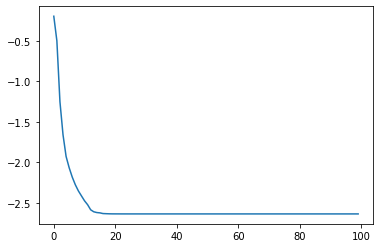

In [85]:
import matplotlib.pyplot as plt
plt.plot(np.log(error_history))